## Notebook de nettoyage - Projet 2 - David Depouez

### 1. Importation et selection

Importation des modules et lecture du fichier de données

In [1]:
import pandas as pd
from matplotlib import pyplot as pl
import numpy as np
import missingno as msno

dfRaw = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t',low_memory=False)
dfRaw.shape

(320772, 162)

On verifie que le chargement du data frame s'est bien passé

In [2]:
dfRaw.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On fait une selection dans la base de données sur les produits (Fromages) que nous allons etudier (lignes du DataFrame)

In [3]:
# select relevant individuals
dfRaw = dfRaw[dfRaw['categories_fr'].str.contains('Fromages au lait cru|Fromages au lait thermisé|Fromages pasteurisés',na=False)]
dfRaw.shape

(1751, 162)

On supprime les Fromages Blancs qui ont été selectionnés malgré tout

In [4]:
# exclude irrelevant
dfRaw = dfRaw[~dfRaw['categories_fr'].str.contains('Fromages blancs',na=False)]
dfRaw.shape

(1732, 162)

Pour notre étude on fait un tri sur les variables (colonnes du DataFrame) pertinentes à priori.

In [5]:
# pre select relevant variables
selectedCols = ['code','product_name','categories_fr','nutrition_grade_fr','energy_100g','energy-from-fat_100g', 'fat_100g',
'saturated-fat_100g','monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
'cholesterol_100g','lactose_100g','proteins_100g','salt_100g','sodium_100g','vitamin-a_100g',
'vitamin-d_100g','vitamin-b2_100g','vitamin-b9_100g','vitamin-b12_100g','potassium_100g','calcium_100g',
'phosphorus_100g', 'magnesium_100g','water-hardness_100g','carbohydrates_100g', 'fiber_100g'
]

# data frame
dfReduct = dfRaw[selectedCols]
dfReduct.shape

(1732, 27)

Voici un diagramme representant les taux d'occupation de chaque (variables) colonnes.  
Sur la ligne du haut, on voit le nombre de valeurs saisies sur une population de 1732 individus (les fromages).

<AxesSubplot:>

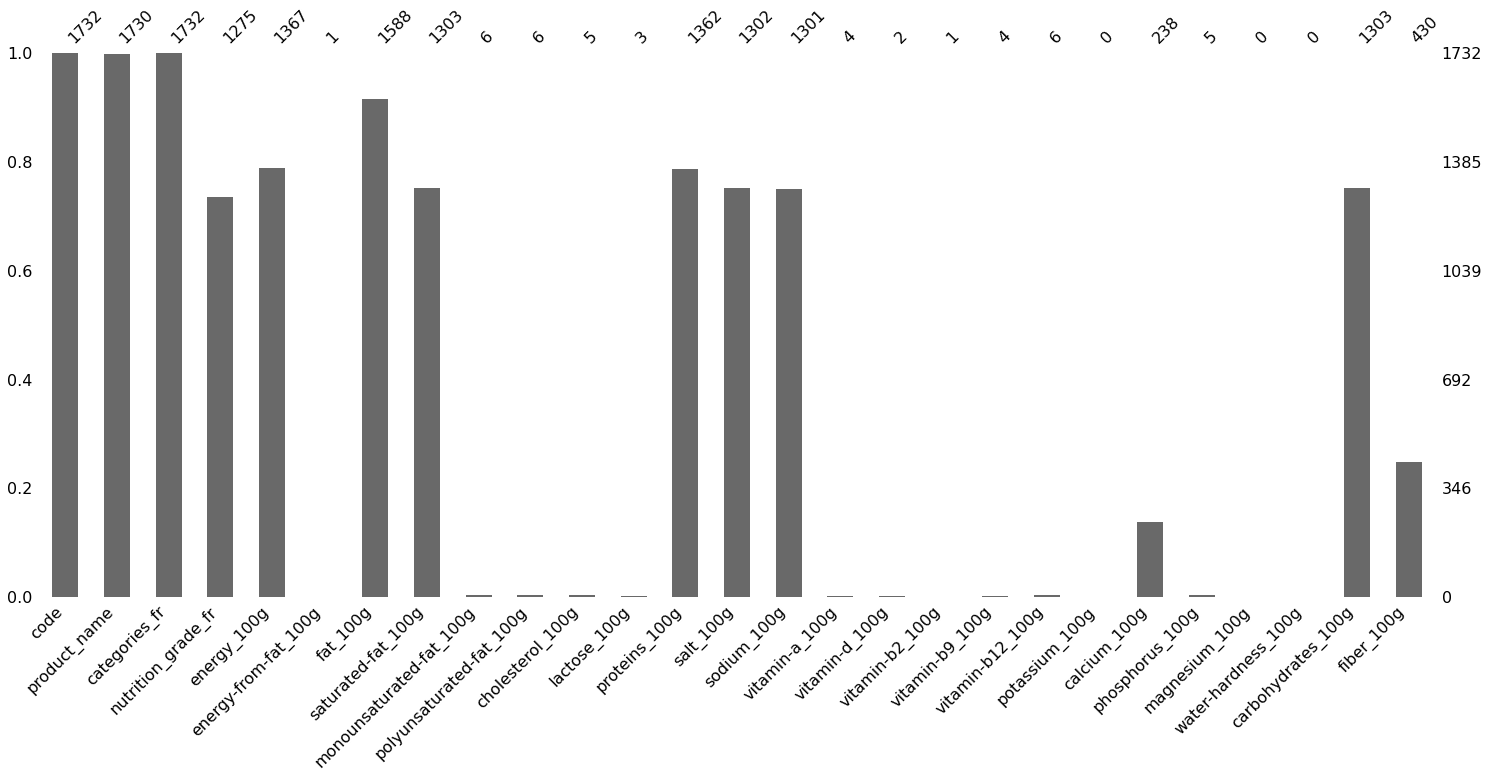

In [6]:
msno.bar(dfReduct)

On supprime les variables qui ont plus de 50% de valeurs manquantes (NaN)

In [7]:
dfReduct = dfReduct.dropna(thresh=len(dfReduct) / 2, axis=1)
dfReduct.shape

(1732, 11)

On regarde le type des données qu'on va manipuler.

In [8]:
dfReduct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 13537 to 318424
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                1732 non-null   object 
 1   product_name        1730 non-null   object 
 2   categories_fr       1732 non-null   object 
 3   nutrition_grade_fr  1275 non-null   object 
 4   energy_100g         1367 non-null   float64
 5   fat_100g            1588 non-null   float64
 6   saturated-fat_100g  1303 non-null   float64
 7   proteins_100g       1362 non-null   float64
 8   salt_100g           1302 non-null   float64
 9   sodium_100g         1301 non-null   float64
 10  carbohydrates_100g  1303 non-null   float64
dtypes: float64(7), object(4)
memory usage: 162.4+ KB


On verifie la validitée des variables :  
1. les flottant qui correspondent à des taux doivent etre compris dans l'intervalle [0-100]
2. l'energie doit etre un nombre positif
3. le nutrition grade doit etre une lettre comprise dans [A-E]
4. code, product_name et categories sont informationelles et ne participeront pas à l'étude statistique

Pour 1 et 2 on regarde les min() et max()

In [9]:
dfReduct.describe()

,energy_100g,fat_100g,saturated-fat_100g,proteins_100g,salt_100g,sodium_100g,carbohydrates_100g
count,1367.000000,1588.000000,1303.000000,1362.000000,1302.000000,1301.000000,1303.000000
mean,1325.812143,26.161738,17.940107,19.106968,1.503074,0.592216,1.179253
std,344.366482,6.244512,4.369416,6.513131,0.656081,0.257876,1.867782
min,1.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000
25%,1154.000000,22.000000,15.650000,16.000000,1.198880,0.472000,0.000000
50%,1356.000000,27.000000,18.000000,19.700000,1.500000,0.590551,0.500000
75%,1504.000000,30.000000,21.000000,23.375000,1.795135,0.708661,1.500000
max,7029.000000,60.000000,31.000000,47.000000,6.300000,2.480315,32.200000


Pour le 3 on vérifie les valeurs saisies du nutriscore.

In [10]:
dfReduct['nutrition_grade_fr'].value_counts()

d    1102
c      85
e      76
b      10
a       2
Name: nutrition_grade_fr, dtype: int64

On regarde les éventuelles correlations entre variables numériques.

In [11]:
dfReduct.corr()

,energy_100g,fat_100g,saturated-fat_100g,proteins_100g,salt_100g,sodium_100g,carbohydrates_100g
energy_100g,1.000000,0.729771,0.626538,0.384409,0.074206,0.075982,-0.134319
fat_100g,0.729771,1.000000,0.873396,0.118476,0.120314,0.122483,-0.096704
saturated-fat_100g,0.626538,0.873396,1.000000,0.076974,0.139929,0.133827,-0.096924
proteins_100g,0.384409,0.118476,0.076974,1.000000,0.119546,0.121400,-0.456184
salt_100g,0.074206,0.120314,0.139929,0.119546,1.000000,1.000000,-0.171161
sodium_100g,0.075982,0.122483,0.133827,0.121400,1.000000,1.000000,-0.172179
carbohydrates_100g,-0.134319,-0.096704,-0.096924,-0.456184,-0.171161,-0.172179,1.000000


On voit que le sel et le sodium sont fortement corrélés, on supprime donc la variable sodium de l'étude.

In [12]:
dfReduct = dfReduct.drop('sodium_100g',axis=1)

On affiche le diagramme pour vérification suite aux suppressions.

<AxesSubplot:>

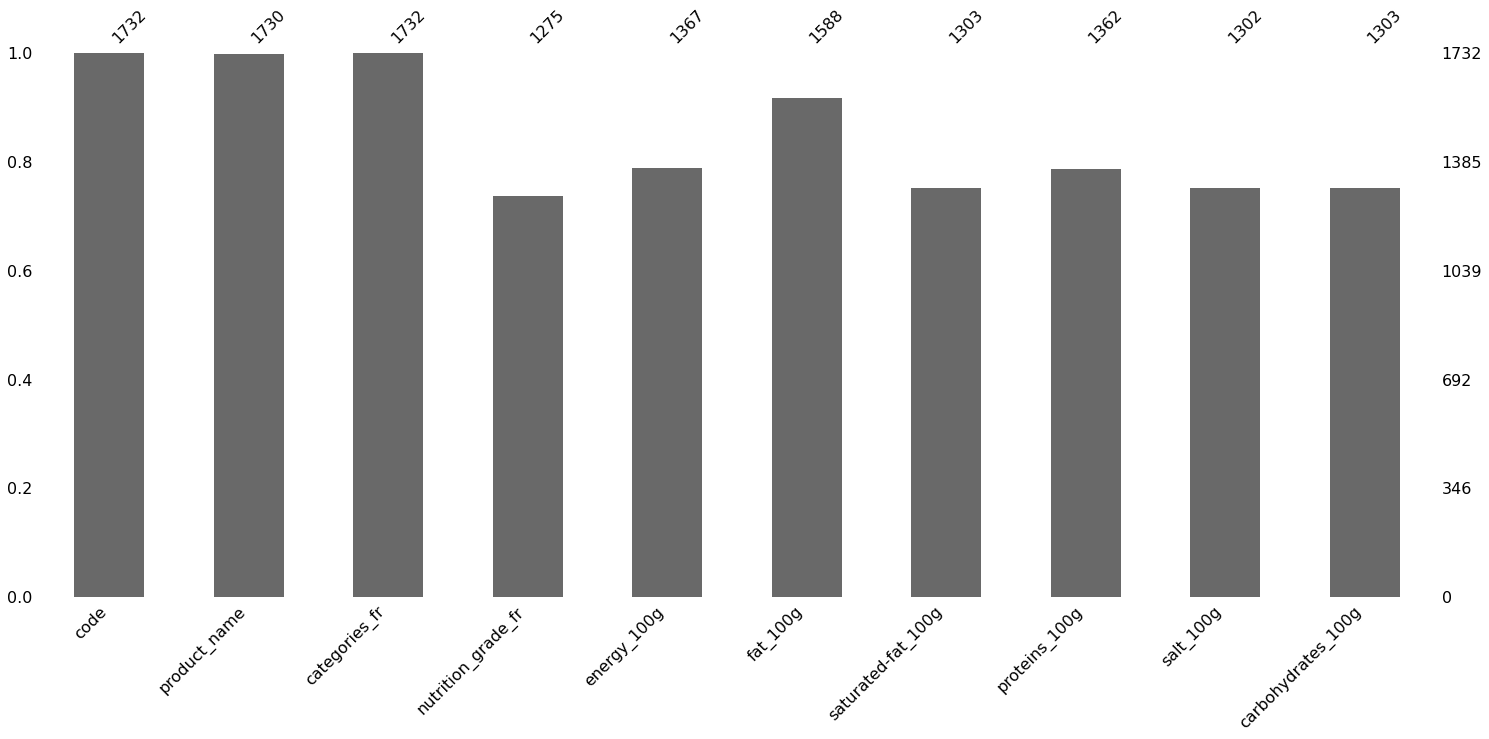

In [13]:
msno.bar(dfReduct)

On a du se débarasser de beaucoup de variables pertinentes pour notre étude (Calcium, Vitamine B2,B12, Phosphore, lactose, cholesterol) car il n'y en avait pas assez donc on va se concentrer sur celles qui restent.

### 2. Traitement des variables abérantes et atypiques

On se crée des fonctions pour étudier les variables aberrantes et atypiques.  
Puis on va calculer l'écart interquartile et afficher des boxplot avant et après traitement des outliers.  
La stratégie choisie est de généraliser plutot qu'exclure les outliers.  
On va donc plafonner les outliers aux valeurs limites des boxplots.

In [14]:
# Function to detect outliers
def computeInterQuartile(colName,dFrame) :
    a = dFrame[colName].quantile([0.25, 0.5, 0.75])
    Q1 = a.iloc[0]
    Q2 = a.iloc[1]
    Q3 = a.iloc[2]
    IQR = Q3 - Q1
    vmin = Q1 - 1.5*IQR
    if vmin < 0 :
        vmin = 0.0
    vmax = Q3 + 1.5*IQR
    # For debug
    #print("Q1 {:2.3} Q2 {:2.3} Q3 {:2.3} IQR {:2.3} vmin {:2.3} vmax {:2.3}".format(Q1,Q2,Q3,IQR,vmin,vmax))
    return (vmin,vmax)

# Display outliers and according boxplot
def displayOutliers(colName,dFrame,isDump) :
    vmin, vmax = computeInterQuartile(colName,dFrame)
    # For debug
    #print("{} vmin {:2.3} vmax {:2.3}".format(colName,vmin,vmax))
    mask = (dFrame[colName] > vmax) | (dFrame[colName] < vmin)
    nbOutliers = len(dFrame.loc[mask == True , :])
    if nbOutliers != 0 and isDump == True:
        display(dFrame.loc[mask == True ,['code',colName,'product_name']].sort_values(by=colName))
    dfReduct.boxplot(column = colName, grid = False)
    return (vmin,vmax,nbOutliers)

# Clip to min and max values
def clipOutliers(colName,dFrame,low=None,up=None) :
    if(low == None or up == None) :
        low, up = computeInterQuartile(colName,dFrame)
#    print("min is {} max is {}".format(low,up))
    dFrame[colName].clip(lower=low,upper=up,inplace=True)

Sur chaque variable on fiat une détection et on plafonne les outliers comme mentionné plus haut.  
On affiche pour information les outliers détectés et on va aller vérifier les cas extremes uniquement (probablement des erreurs) sur le site open food fact avec le code produit. On choisit de corriger les erreurs trouvées au lieu de les ignorer.

,code,energy_100g,product_name
211141,3256224332312,1.0,Emmental français Râpé (28 % MG)
198964,3184670001387,136.0,La faiselle
299104,7622300563240,192.0,Philadelphia light
220618,3272770003629,229.0,Tartare Ail & Fines herbes
254083,3760151012471,324.0,"Fromage de Chèvre 1,2% MG"
235022,3480347290017,330.0,Carré Frais 0% Ail & Fines Herbes
235027,3480356262005,330.0,Carré Frais (0% MG) - 200 g - Elle & Vire
235005,3480342917803,335.0,Carré frais 0% poivre et baies roses
217074,3263859711511,365.0,Faiselle
222761,3286151310107,398.0,Fromages frais en faisselles (7% MG)


36 Outliers détectés


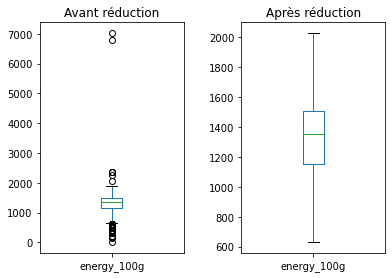

In [15]:
colName = 'energy_100g'
pl.figure()
pl.subplot(121)
pl.title('Avant réduction')
minClip, maxClip, nbOutliersBefore = displayOutliers(colName,dfReduct,True)
print('{} Outliers détectés'.format(nbOutliersBefore))

#correction manuelle pour l'énergie
dfReduct.at[211141,colName] = 1532.0
dfReduct.drop(axis = 0, index = 198964, inplace=True) # c'est un fromage blanc non détécté, alors on l'enlève.
dfReduct.at[299104,colName] = 640.0

dfReduct.at[240071,colName] = 1626.0
dfReduct.at[250717,colName] = 1680.0

pl.subplot(122)
pl.title('Après réduction')
clipOutliers(colName,dfReduct,minClip,maxClip)
minClip, maxClip, nbOutliersAfter = displayOutliers(colName,dfReduct,False)
pl.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
pl.show()

,code,fat_100g,product_name
252578,3760075290108,0.0,Reblochon de Savoie (22% MG) Bio
235027,3480356262005,0.2,Carré Frais (0% MG) - 200 g - Elle & Vire
235022,3480347290017,0.2,Carré Frais 0% Ail & Fines Herbes
235005,3480342917803,0.2,Carré frais 0% poivre et baies roses
254083,3760151012471,1.2,"Fromage de Chèvre 1,2% MG"
299104,7622300563240,3.5,Philadelphia light
216665,3263859401313,4.0,Ligne fine à tartiner nature
195542,3155250321799,5.0,Bridelight (5%MG) - 350 g
195540,3155250317914,5.0,Bridelight (5 % MG)
220618,3272770003629,5.2,Tartare Ail & Fines herbes


35 Outliers détectés


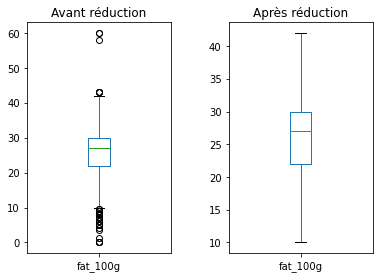

In [16]:
colName = 'fat_100g'
pl.figure()
pl.subplot(121)
pl.title('Avant réduction')
minClip, maxClip, nbOutliersBefore = displayOutliers(colName,dfReduct, True)
print('{} Outliers détectés'.format(nbOutliersBefore))

#correction manuelle pour fat
dfReduct.at[252578,colName] = 22.0

pl.subplot(122)
pl.title('Après réduction')
clipOutliers(colName,dfReduct,minClip,maxClip)
minClip, maxClip, nbOutliersAfter = displayOutliers(colName,dfReduct, False)
pl.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
pl.show()

,code,saturated-fat_100g,product_name
291207,7612464364708,0.00,Fromage Le Tonneau
254083,3760151012471,0.00,"Fromage de Chèvre 1,2% MG"
235005,3480342917803,0.12,Carré frais 0% poivre et baies roses
235022,3480347290017,0.12,Carré Frais 0% Ail & Fines Herbes
235027,3480356262005,0.12,Carré Frais (0% MG) - 200 g - Elle & Vire
299104,7622300563240,2.20,Philadelphia light
216665,3263859401313,2.60,Ligne fine à tartiner nature
195540,3155250317914,3.50,Bridelight (5 % MG)
195542,3155250321799,3.50,Bridelight (5%MG) - 350 g
195547,3155250328651,4.00,Bridelight (6 % MG) Fruité & Fondant


41 Outliers détectés


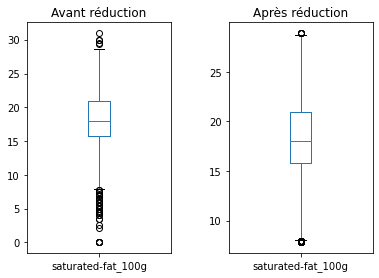

In [17]:
colName = 'saturated-fat_100g'
pl.figure()
pl.subplot(121)
pl.title('Avant réduction')
minClip, maxClip, nbOutliersBefore = displayOutliers(colName,dfReduct, True)
print('{} Outliers détectés'.format(nbOutliersBefore))

#correction manuelle pour saturated
dfReduct.at[291207,colName] = 20.0

pl.subplot(122)
pl.title('Après réduction')
clipOutliers(colName,dfReduct,minClip,maxClip)
minClip, maxClip, nbOutliersAfter = displayOutliers(colName,dfReduct, False)
pl.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
pl.show()

,code,proteins_100g,product_name
220618,3272770003629,1.5,Tartare Ail & Fines herbes
277024,5400247026507,1.7,Brie
299104,7622300563240,2.5,Philadelphia light
217074,3263859711511,3.2,Faiselle
312032,8480017480958,3.4,Mascarpone (42% MG) - 250 g - Dia
243608,3564709015248,3.6,"Faisselle de la Bresse (7,4 % MG)"
252215,3760056260496,3.8,Mascarpone
220630,3272770088770,4.0,Le coffret du Fromager
222761,3286151310107,4.4,Fromages frais en faisselles (7% MG)
216671,3263859404024,4.5,Mascarpone (40% MG) - 250 g - Leader Price


13 Outliers détectés


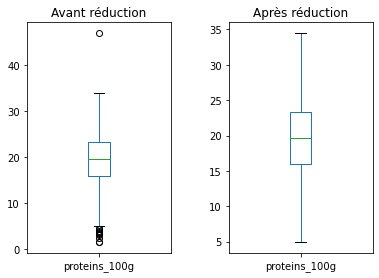

In [18]:
colName = 'proteins_100g'
pl.figure()
pl.subplot(121)
pl.title('Avant réduction')
minClip, maxClip, nbOutliersBefore = displayOutliers(colName,dfReduct, True)
print('{} Outliers détectés'.format(nbOutliersBefore))

#correction manuelle pour proteins
#dfReduct.at[277024,colName] = 17
#dfReduct.at[299104,colName] = 8.3

pl.subplot(122)
pl.title('Après réduction')
clipOutliers(colName,dfReduct,minClip,maxClip)
minClip, maxClip, nbOutliersAfter = displayOutliers(colName,dfReduct, False)
pl.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
pl.show()

,code,salt_100g,product_name
237163,3542864052018,0.0000,Comté bio
291207,7612464364708,0.0000,Fromage Le Tonneau
255261,3770001532271,0.0000,Briquette de l'écaillon dorée
200766,3222473443598,0.0000,Mozzarella
220642,3272770093637,0.0010,St Morêt Ligne & Plaisir
...,...,...,...
201272,3222475318726,3.8100,Roquefort AOP Bio au lait cru de brebis (32 % MG)
199764,3222471018446,3.8100,Roquefort AOP (31 % MG)
205376,3250390175940,4.0000,Bleu des Causses AOP (30 % MG)
226547,3340040000019,4.2926,Quart de Vieux Lille


100 Outliers détectés


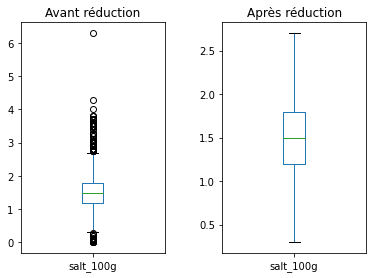

In [19]:
colName = 'salt_100g'
pl.figure()
pl.subplot(121)
pl.title('Avant réduction')
minClip, maxClip, nbOutliersBefore = displayOutliers(colName,dfReduct,True)
print('{} Outliers détectés'.format(nbOutliersBefore))

#correction manuelle pour salt
#dfReduct.at[237163,colName] = 0.9
#dfReduct.at[291207,colName] = 1.5
#dfReduct.at[200766,colName] = 0.35

pl.subplot(122)
pl.title('Après réduction')
clipOutliers(colName,dfReduct,minClip,maxClip)
minClip, maxClip, nbOutliersAfter = displayOutliers(colName,dfReduct,False)
pl.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
pl.show()

,code,carbohydrates_100g,product_name
230100,3387270120704,3.8,Brique du Velay (25 % MG)
220686,3272770097376,3.8,St Môret Apéritif 24 billes au coeur de pesto
233698,3450970024686,4.0,Emmental râpé (28% MG)
218408,3267031070885,4.0,Camembert à cuire au four
212392,3257980649188,4.0,"Ail & fines herbes (6,8 % MG)"
...,...,...,...
199682,3222120008439,13.0,Chèvre chaud (21% MG)
200415,3222472764830,13.0,Fromages de chèvre à dorer
251691,3760025680188,15.0,U PECURINU
223726,3294580102019,21.0,Reblochon de Savoie AOP Fruitier


64 Outliers détectés


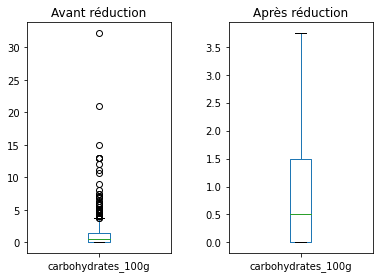

In [20]:
colName = 'carbohydrates_100g'
pl.figure()
pl.subplot(121)
pl.title('Avant réduction')
minClip, maxClip, nbOutliersBefore = displayOutliers(colName,dfReduct,True)
print('{} Outliers détectés'.format(nbOutliersBefore))

#correction manuelle pour salt
#dfReduct.at[223726,colName] = 0.5
#dfReduct.at[251691,colName] = 1.5

pl.subplot(122)
pl.title('Après réduction')
clipOutliers(colName,dfReduct,minClip,maxClip)
minClip, maxClip, nbOutliersAfter = displayOutliers(colName,dfReduct,False)
pl.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
pl.show()

### 3. Traitements des valeurs manquantes

Ci dessous on peut voir les niveau d'occupation des variables.  
Les lignes noires et blanches correspondent respectivement aux valeurs saisies et manquantes (NaN).

<AxesSubplot:>

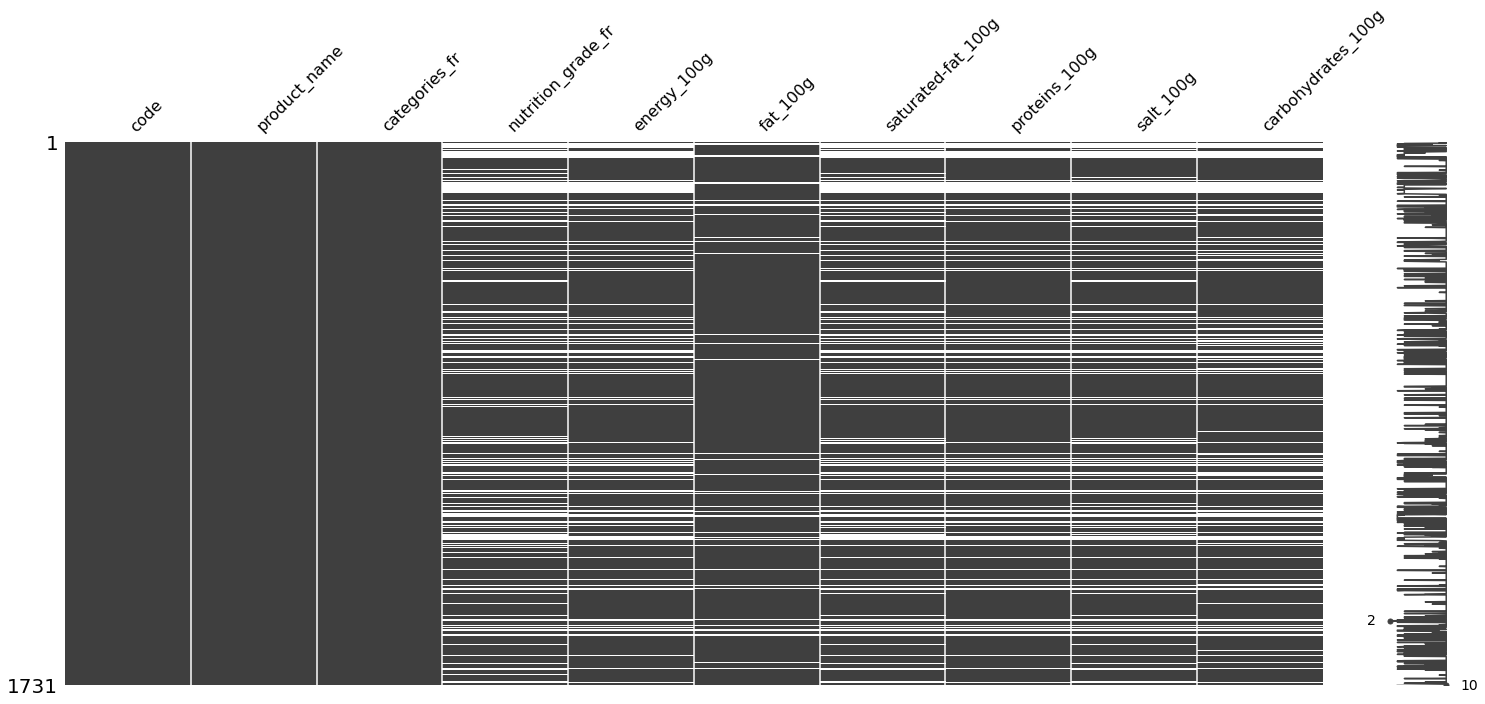

In [21]:
msno.matrix(dfReduct)

On va utiliser 3 méthodes pour imputer les valeurs manquantes :  
1. On impute par la valeur mediane ou moyenne
2. Si deux variables sont linéairement corrélées on peut déterminer l'une en fonction de l'autre
3. On peut utiliser l'algorithme kNN des plus proches voisins

Tout d'abord, on genere un DataFrame réduit en excluant les valeurs manquantes.

In [22]:
dfFull = dfReduct.dropna(inplace=False)

#### a. Imputation des valeurs manquantes avec la valeurs moyenne ou médiane pour le taux de sel

On affiche l'histogramme du taux de sel. On voit que la dispersion est faible et que les valeurs moyennes et médianes sont proches (principalement car les outliers ont été enlevés ce qui réduit la forte dépendance de la moyenne)

salt_100g : mean 1.47 median 1.5 std 0.543 std/mean 0.37


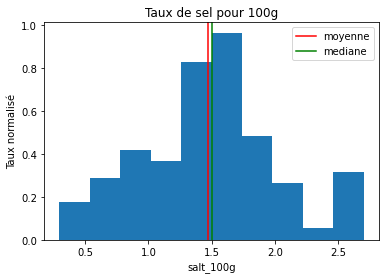

In [23]:
# function to display histogram then dump statistical relevant values
def getHistogramme(dataFrame, name, title) :
    pl.xlabel(name)
    pl.ylabel('Taux normalisé')
    pl.title(title)
    dataFrame[name].hist(density=True,grid=False,stacked=True)
    mean = dataFrame[name].mean()
    median = dataFrame[name].median()
    std = dataFrame[name].std()
    pl.axvline(x=mean,color='red',linestyle='-',label='moyenne')
    pl.axvline(x=median,color='green',linestyle='-',label='mediane')
    pl.legend()
    print("{} : mean {:2.3} median {:2.3} std {:2.3} std/mean {:2.3}".format(name,mean, median, std, std/mean))
    return (mean, median, std)

name = 'salt_100g'
mean, median, std = getHistogramme(dfFull,name,'Taux de sel pour 100g')

On affecte la valeur mediane aux valeurs manquantes pour le Sel

In [24]:
dfReduct['salt_100g'].fillna(median,inplace=True)

On vérifie sur le diagramme que la colonne taux de sel ne contient plus de valeurs manquantes.

<AxesSubplot:>

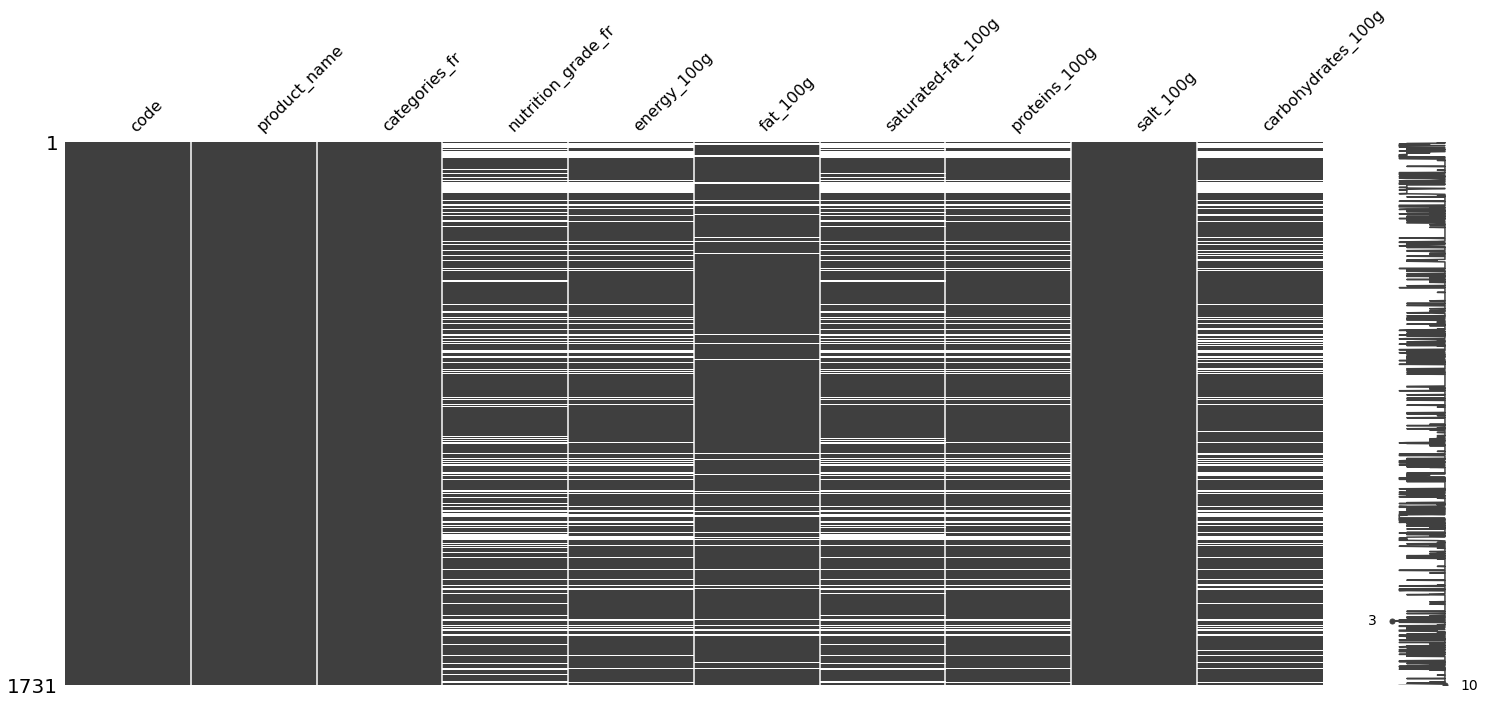

In [25]:
msno.matrix(dfReduct)

#### b. Imputations de valeurs manquantes par régression linéaire sur une variable.

On affiche les correlations entre variables et on va appliquer la méthode au couple entre fat_100g et saturated-fat_100g 

In [26]:
dfFull.corr()

,energy_100g,fat_100g,saturated-fat_100g,proteins_100g,salt_100g,carbohydrates_100g
energy_100g,1.000000,0.919366,0.818642,0.459042,0.096039,-0.276848
fat_100g,0.919366,1.000000,0.920489,0.107725,0.079219,-0.097707
saturated-fat_100g,0.818642,0.920489,1.000000,0.065636,0.084864,-0.080819
proteins_100g,0.459042,0.107725,0.065636,1.000000,0.119042,-0.656875
salt_100g,0.096039,0.079219,0.084864,0.119042,1.000000,-0.256555
carbohydrates_100g,-0.276848,-0.097707,-0.080819,-0.656875,-0.256555,1.000000


On remarque que saturated_fat possède plus de valeurs manquantes que fat.

In [27]:
dfReduct.isna().sum()

code                    0
product_name            2
categories_fr           0
nutrition_grade_fr    457
energy_100g           365
fat_100g              144
saturated-fat_100g    429
proteins_100g         370
salt_100g               0
carbohydrates_100g    429
dtype: int64

On va utiliser la meme méthode pour imputer les valeurs manquantes de fat_100g.
Puis, vu la forte corrélation entre fat_100g et saturated-fat on va determiner les valeurs manquantes de cette dernière en faisant une régression linéaire sur les valeurs de fat_100g

On affiche un diagramme en point et on fit sur un modèle linéaire.

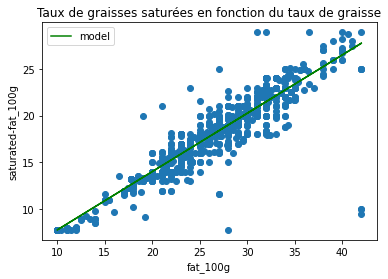

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = dfFull['fat_100g'].values.reshape(-1,1)
y = dfFull['saturated-fat_100g'].values.reshape(-1,1)
regr.fit(x, y)
y_predict = regr.predict(x)
pl.title('Taux de graisses saturées en fonction du taux de graisse')
pl.xlabel('fat_100g')
pl.ylabel('saturated-fat_100g')
pl.scatter(x, y)
pl.plot(x, y_predict, color='g',label='model')
pl.legend()
pl.show()

Sur le data frame complet on sélectionne les individus avec une valeur de fat connue et une valeur de saturated fat inconnue.  
On fait la regression sur un nouveau data frame temporaire

In [29]:
# selection des valeurs manquantes de saturated_fat en fonction de fat
mask = ((~dfReduct['fat_100g'].isna() == True) & (dfReduct['saturated-fat_100g'].isna() == True))
dfFull2 = dfReduct.loc[mask == True, ['fat_100g','saturated-fat_100g']]

predictedSatFat = regr.predict(dfFull2['fat_100g'].values.reshape(-1,1))
a = predictedSatFat.reshape(-1)

# fill df2 fat-saturated according with predicted values
for i, val in enumerate(a):
    dfFull2.iloc[i,1] = val

On reporte les valeurs du data frame temporaire sur le data frame réduit

In [30]:
# report values in dfReduc dataset
for i in range(len(dfFull2)):
    dfReduct.loc[dfFull2.index[i],'saturated-fat_100g'] = dfFull2.iloc[i,1]

On affiche maintemant l'histogramme de la variable fat et on va remplacer les dernieres valeurs manquantes de fat par la médiane comme dans le 1.  
Puis on va affecter la valeur prédite de la médiane pour saturated fat

fat_100g : mean 26.4 median 27.0 std 6.02 std/mean 0.228


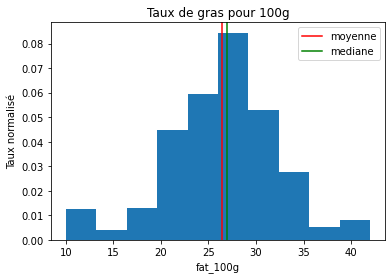

In [31]:
name = 'fat_100g'
fatMean, fatMedian, fatStd = getHistogramme(dfFull,name,'Taux de gras pour 100g')

In [32]:
# get median value for fat and predicted median one for saturated-fat and fill NaN values of dataset with them
predSaturatedFatMedian = float(regr.predict([[fatMedian]]))
dfReduct['fat_100g'].fillna(fatMedian,inplace=True)
dfReduct['saturated-fat_100g'].fillna(predSaturatedFatMedian,inplace=True)

On affiche le diagramme et on voit que sel, fat et saturated fat n'ont plus de valeurs manquantes.

<AxesSubplot:>

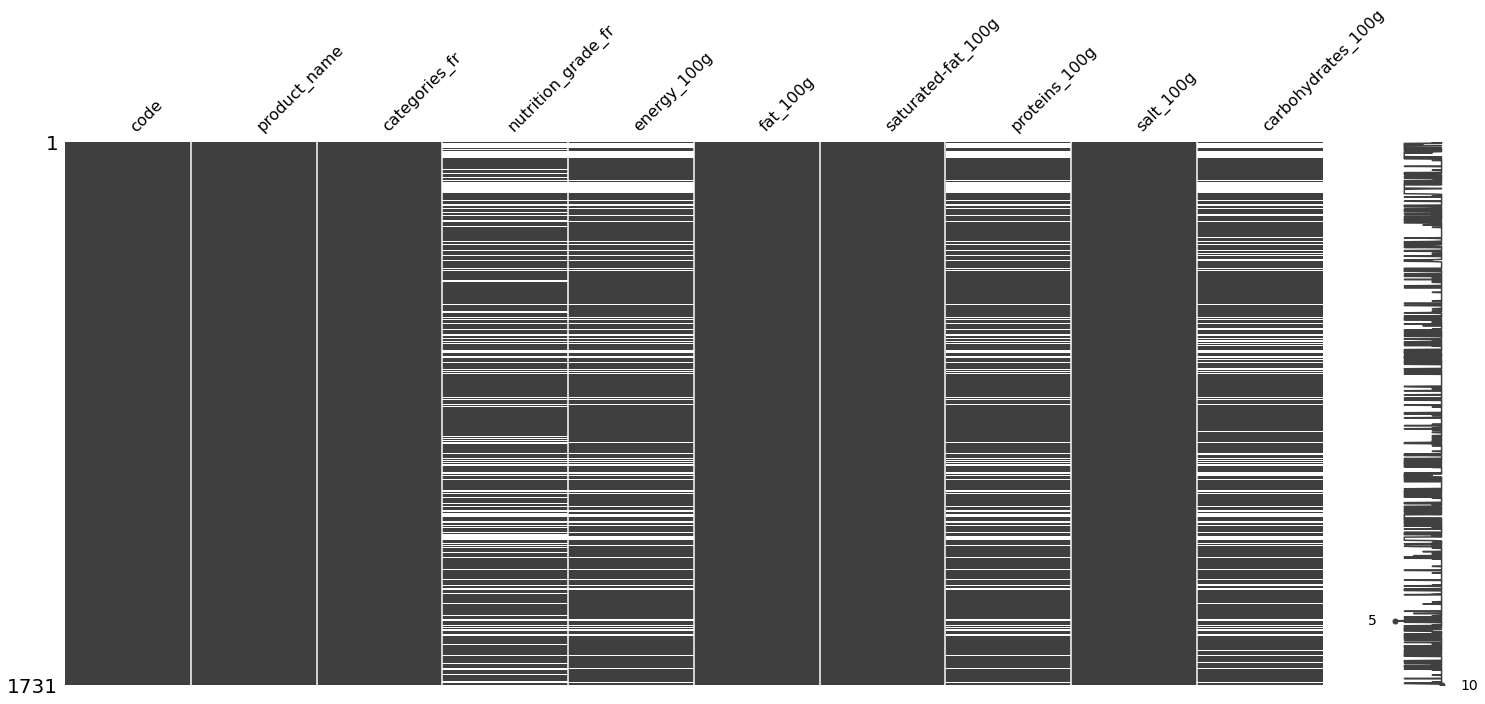

In [33]:
msno.matrix(dfReduct)

#### c. Remplissage des dernieres valeurs manquantes avec kNN

On sauvegarde temporairement les variables informatives qu'on reportera a la fin

In [34]:
colToStore = ['code','product_name','categories_fr']
dfBackup = dfReduct.loc[:,colToStore]
dfReduct = dfReduct.drop(colToStore,axis=1)

On remplace les valeurs textuelles du nutrition score par des valeurs numériques

In [35]:
dfReduct['nutrition_grade_fr'].replace(['a','b','c','d','e'],[0,1,2,3,4],inplace=True)

On importe le module et on crée une instance.

In [36]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

On met au format NumPy puis on applique.

In [37]:
X = dfReduct.to_numpy()
imputer.fit(X)
XTransf = imputer.transform(X)
XTransf.shape

(1731, 7)

On repasse au format Data Frame

In [38]:
col = dfReduct.columns.tolist()
lines = dfReduct.index.tolist()
dfReduct = pd.DataFrame(XTransf,
                 index=lines,
                 columns=col)

On affiche le diagramme pour vérifier qu'il n'y à plus de valeurs manquantes.

<AxesSubplot:>

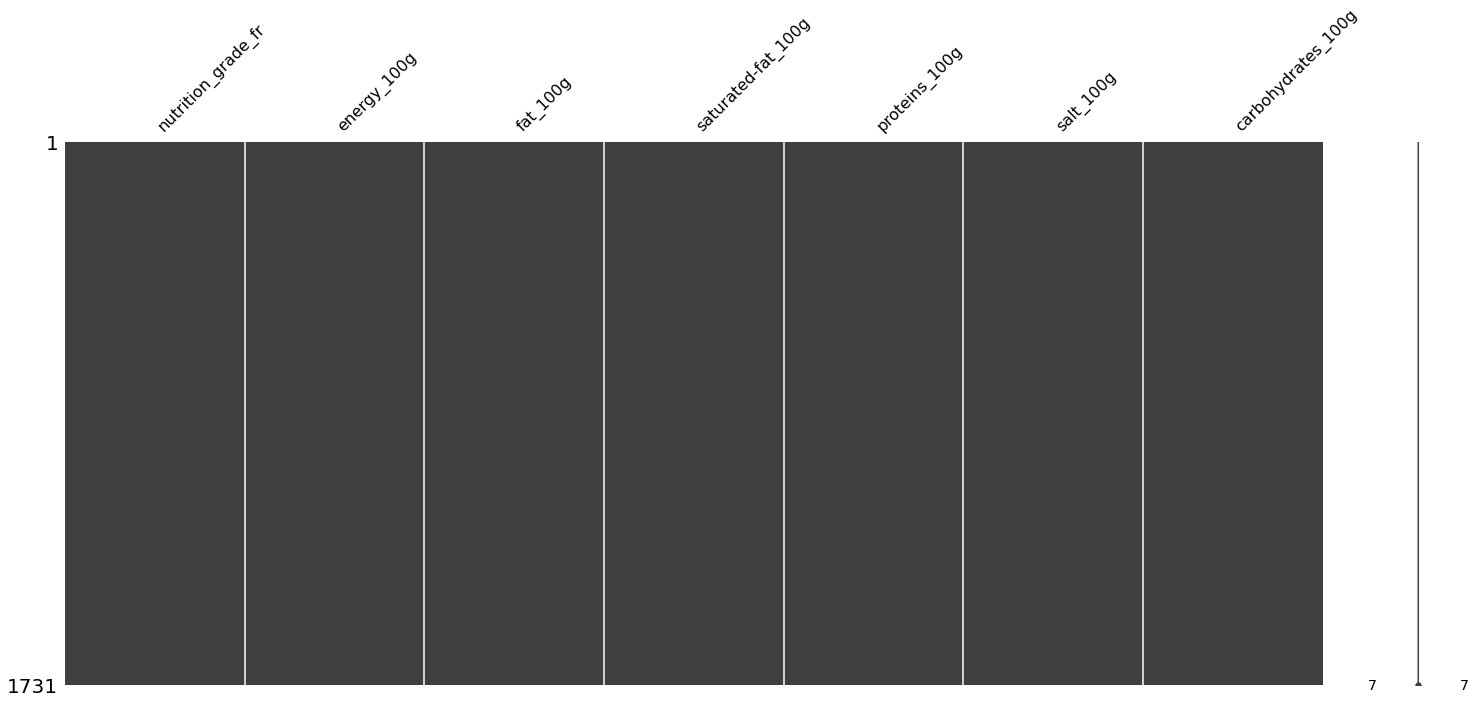

In [39]:
msno.matrix(dfReduct)

On arrondit les valeurs flottantes interpolées de nutrition score a l'entier

In [40]:
dfReduct = dfReduct.round({'nutrition_grade_fr': 0})

On reporte les colonnes précédement sauvegardées et on vérifie.

In [41]:
dfFinal = pd.concat([dfBackup,dfReduct],axis=1)
dfFinal.head()

,code,product_name,categories_fr,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,proteins_100g,salt_100g,carbohydrates_100g
13537,00170529,Welsh Slate Cavern Aged Cheddar,"Produits laitiers,Fromages,Fromages du Royaume...",3.0,1681.0,33.0,20.1,23.8,1.780,3.00
27419,0031506794322,Buffalo Wing,"Produits laitiers,Fromages,Fromages du Royaume...",4.0,1640.0,32.1,17.9,21.4,2.450,3.57
99796,0079813000118,Boursin Ail & Fines Herbes / Garlic & Fine Herbs,"Produits laitiers,Fromages,Fromages pasteurisés",3.0,1670.0,40.0,26.7,10.0,1.520,3.33
111081,0105400141270233103000350,Gouda vieux,"Produits laitiers,Fromages,Fromages de vache,F...",3.0,1684.0,33.8,22.3,25.5,2.286,0.00
111663,01483246,Mozzarella cheese ball,"Produits laitiers,Fromages,Fromages italiens,F...",2.0,1016.0,19.0,13.0,18.0,0.500,1.50


On sauvegarde le DataFrame final sous forme de fichier csv.

In [42]:
dfFinal.to_csv('P2_DataClean.csv',index=True,header=True,index_label=False)